In [68]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("MTA_LIRR_Dataset.csv")
print(df.head())

        Date                        Event Description  AM Peak - Late  \
0  9/30/2025  Vehicle on tracks - Far Rockaway Branch               0   
1  9/30/2025     Vehicle on tracks - Hempstead Branch               0   
2  9/28/2025            Ryder Cup loading system wide               0   
3  9/27/2025            Ryder Cup loading system wide               0   
4  9/26/2025            Ryder Cup loading system wide               0   

   AM Peak - Canceled  AM Peak - Terminated  PM Peak - Late  \
0                   0                     0               3   
1                   0                     0               1   
2                   0                     0               0   
3                   0                     0               0   
4                   0                     0               0   

   PM Peak - Canceled  PM Peak - Terminated  Off Peak - Late  \
0                   1                     2                3   
1                   0                     2           

In [69]:
#Check for duplicates
duplicates = df[df.duplicated()]
if len(duplicates) > 0:
    print(f"Total number of duplicates found: {len(duplicates)}")
else:
    print("No duplicates found.")

No duplicates found.


In [70]:
#Analysis 1: Weather-Related Cancellations (Tropical Storm or Snow)
weather_condition = df["Event Description"].str.contains("Tropical | Snow", case = False)
weather_df = df.loc[weather_condition, :]

canceled_df = weather_df[["AM Peak - Canceled", "PM Peak - Canceled", "Off Peak - Canceled"]]
weather_stats = canceled_df.agg(["max", "min", "mean", "median"])

print(canceled_df.head())
print(weather_stats)

     AM Peak - Canceled  PM Peak - Canceled  Off Peak - Canceled
209                   0                   0                    0
568                  41                   4                   77
569                   0                   0                    8
577                   0                   0                   12
579                   0                   2                    0
        AM Peak - Canceled  PM Peak - Canceled  Off Peak - Canceled
max                   61.0               116.0                208.0
min                    0.0                 0.0                  0.0
mean                  10.4                14.1                 40.4
median                 0.0                 1.0                  7.0


In [71]:
#Analysis 2: Lateness Caused by Trespassers
trespasser_incident = df["Event Description"].str.contains("Trespasser", case = False)
trespasser_df = df.loc[trespasser_incident, :]

late_df = trespasser_df[["AM Peak - Late", "PM Peak - Late", "Off Peak - Late"]]
trespasser_mean = late_df.mean()

print(late_df.head())
print(trespasser_mean)

    AM Peak - Late  PM Peak - Late  Off Peak - Late
7                0               6                9
38               0               0                2
39              36               0                0
46               0               0                8
59               0               5                5
AM Peak - Late     5.686747
PM Peak - Late     2.686747
Off Peak - Late    9.036145
dtype: float64


In [72]:
#Analysis 3: Total Cancellations vs Terminations During Rush Hour from 2020 to 2025
total_am_peak = df[["AM Peak - Canceled", "AM Peak - Terminated"]].sum()
total_pm_peak = df[["PM Peak - Canceled", "PM Peak - Terminated"]].sum()

print(f"Total AM Peak Canceled/Terminated: {total_am_peak}\nTotal PM Peak Canceled/Terminated: {total_pm_peak}")

Total AM Peak Canceled/Terminated: AM Peak - Canceled      483
AM Peak - Terminated    241
dtype: int64
Total PM Peak Canceled/Terminated: PM Peak - Canceled      558
PM Peak - Terminated    193
dtype: int64


In [78]:
#Analysis 4: Maximum Late Trains per Month in 2024
df["Date"] = pd.to_datetime(df["Date"])
df_2024 = df[df["Date"].dt.year == 2024].copy()
df_2024["Month"] = df_2024["Date"].dt.month

monthly_delays = df_2024.groupby("Month")[["AM Peak - Late", "PM Peak - Late", "Off Peak - Late"]].max()

print(monthly_delays.head())

       AM Peak - Late  PM Peak - Late  Off Peak - Late
Month                                                 
1                  37              28               33
2                   9              10               18
3                  24              11               11
4                  14              13               11
5                  12              18               28


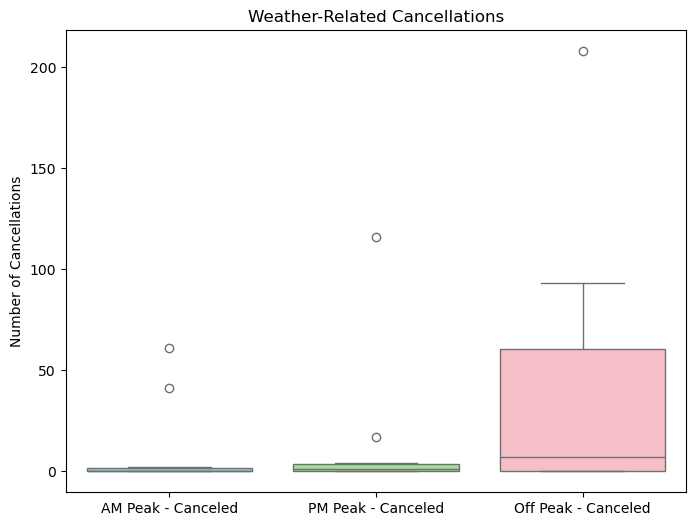

In [74]:
#Analysis 1: Weather-Related Cancellations (Boxplot)
plt.figure(figsize = (8,6))
sns.boxplot(data = canceled_df, palette = ["skyblue", "lightgreen", "lightpink"])
plt.ylabel("Number of Cancellations")
plt.title("Weather-Related Cancellations")
plt.show()

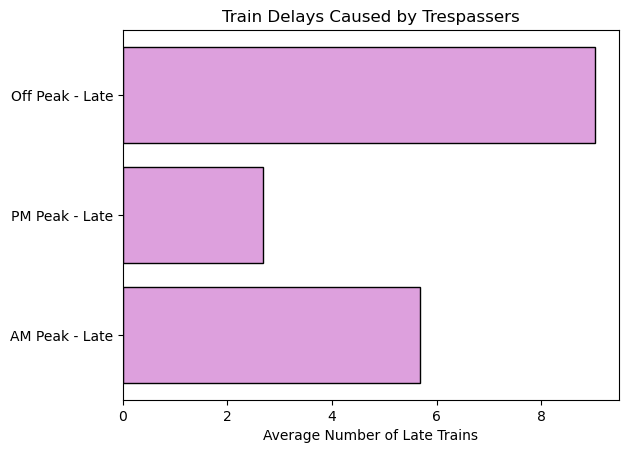

In [75]:
#Analysis 2: Delayed Trains Due to Trespassers (Horizontal Bar Chart)
plt.barh(trespasser_mean.index, trespasser_mean.values, edgecolor = "black", color = "plum")
plt.xlabel("Average Number of Late Trains")
plt.title("Train Delays Caused by Trespassers")
plt.show()

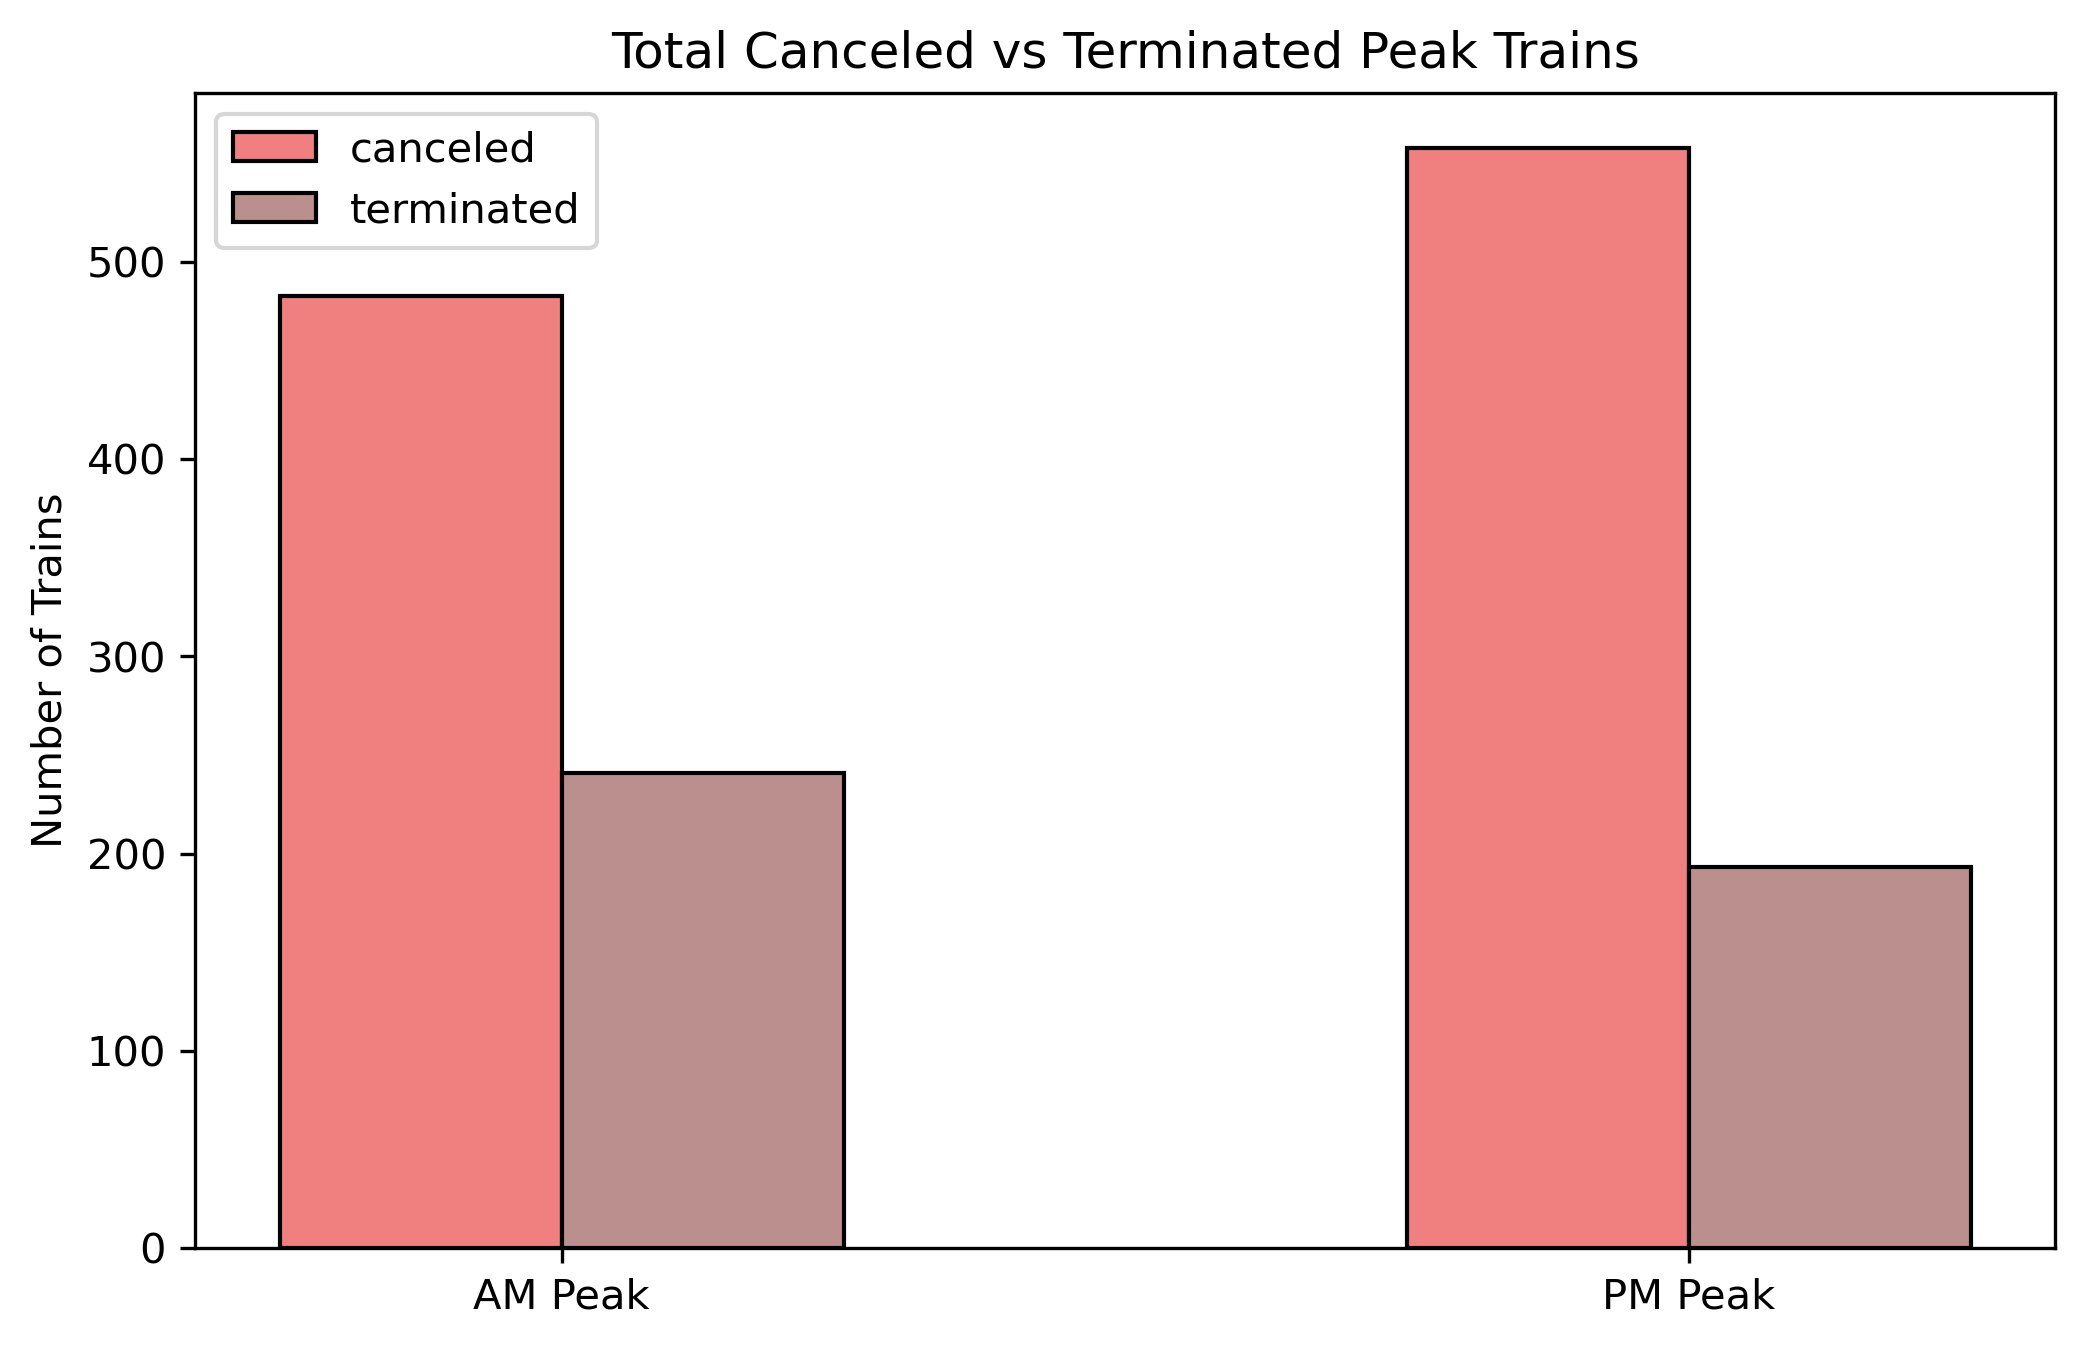

In [76]:
#Analysis 3: Total Canceled vs Terminated Peak Trains (Grouped Bar Chart)
barWidth = 0.25
categories = ["AM Peak", "PM Peak"]
canceled = [483, 558]
terminated = [241, 193]
x = np.arange(len(categories))
x_2 = x + barWidth

fig, ax = plt.subplots(figsize = (8,5), dpi = 300)
ax.bar(x, canceled, color = "lightcoral", width = barWidth, edgecolor = "black", label = "canceled")
ax.bar(x_2, terminated, color = "rosybrown", width = barWidth, edgecolor = "black", label = "terminated")
ax.set_xticks(x + barWidth/2)
ax.set_xticklabels(categories)
ax.set_ylabel("Number of Trains")
ax.set_title("Total Canceled vs Terminated Peak Trains")

ax.legend()
plt.show()

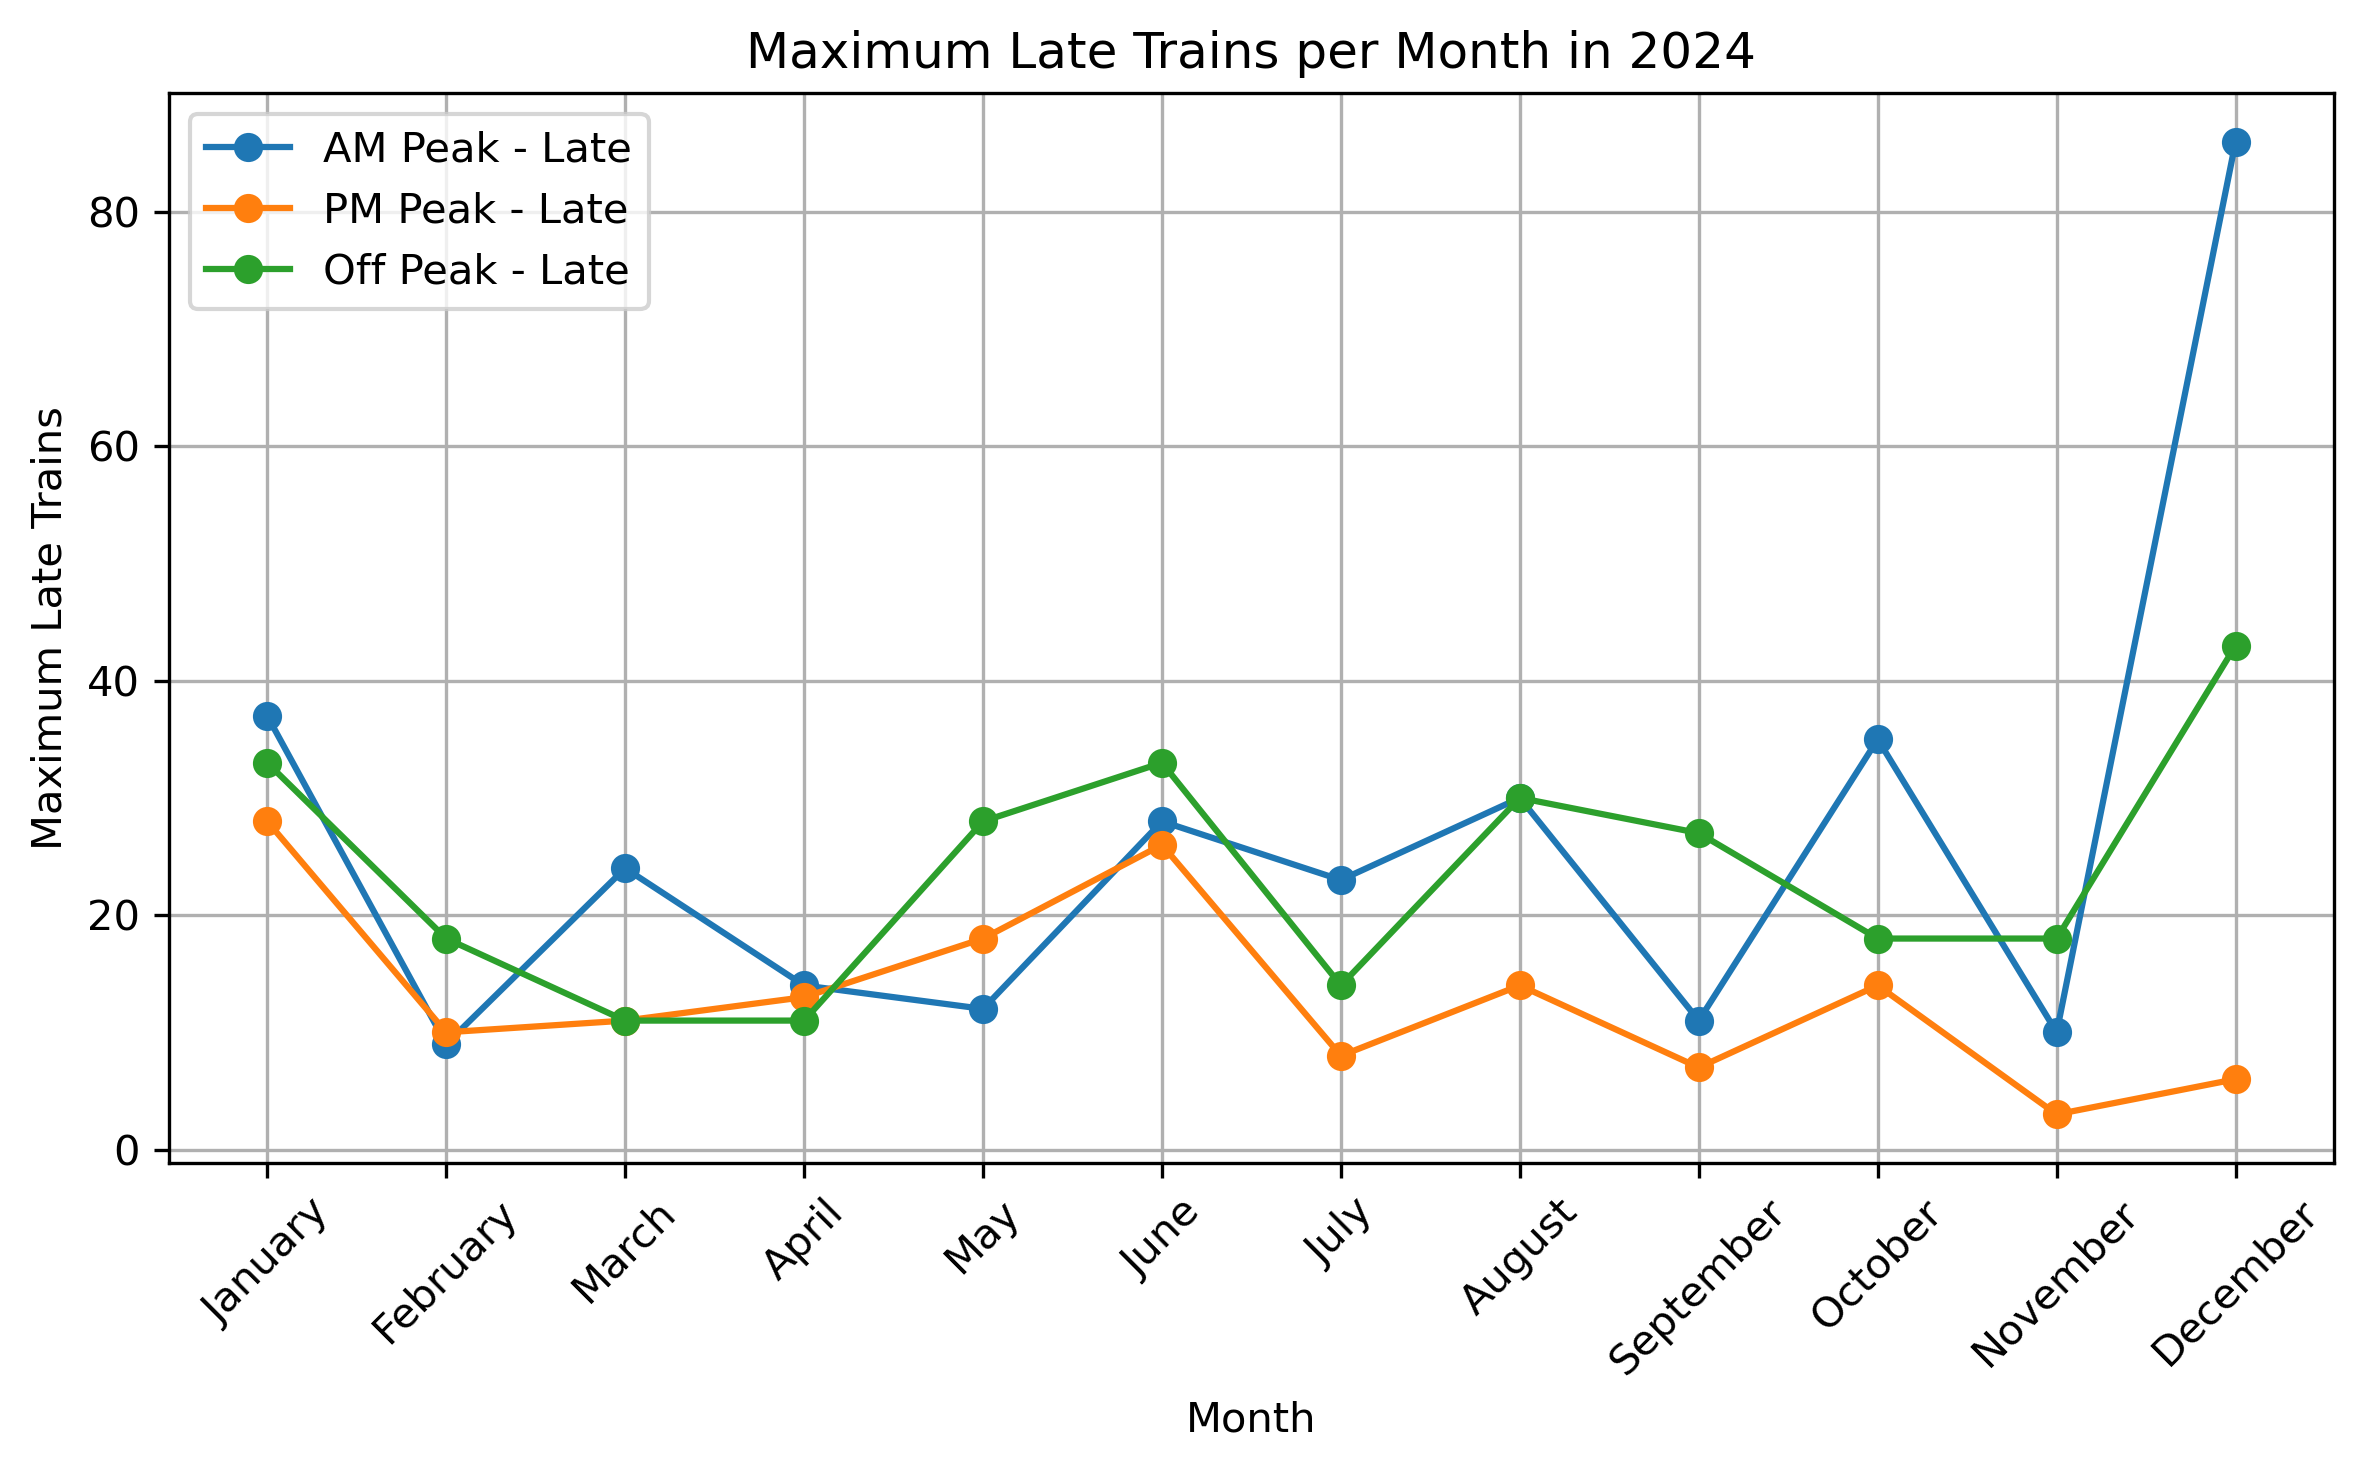

In [77]:
#Analysis 4: Maximum Late Trains per Month in 2024 (Line Chart)
monthly_delays.index = monthly_delays.index.map(lambda x: calendar.month_name[x])

plt.figure(figsize=(8,5), dpi=300)
for col in monthly_delays.columns:
    plt.plot(monthly_delays.index, monthly_delays[col], marker='o', label=col)

plt.xlabel("Month")
plt.ylabel("Maximum Late Trains")
plt.title("Maximum Late Trains per Month in 2024")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()